In [8]:
#Kütüphanelerin Yüklennmesi 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

In [9]:
#verileri okuma 
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
# "Id" sütununu kalıcı olarak kaldırın ve veriyi güncelleyin
df = df.drop("Id", axis=1)

# Veriyi göster
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
new_columns = ['Sepal Lenght Cm','Sepal Width Cm','Petal Length Cm','Petal Width Cm','Species']
df.columns = new_columns

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sepal Lenght Cm  150 non-null    float64
 1   Sepal Width Cm   150 non-null    float64
 2   Petal Length Cm  150 non-null    float64
 3   Petal Width Cm   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df.groupby('Species').agg(['mean','median'])


Sepal Lenght Cm        Sepal Width Cm        Petal Length Cm  \
                           mean median           mean median            mean   
Species                                                                        
Iris-setosa               5.006    5.0          3.418    3.4           1.464   
Iris-versicolor           5.936    5.9          2.770    2.8           4.260   
Iris-virginica            6.588    6.5          2.974    3.0           5.552   

                       Petal Width Cm         
                median           mean median  
Species                                       
Iris-setosa       1.50          0.244    0.2  
Iris-versicolor   4.35          1.326    1.3  
Iris-virginica    5.55          2.026    2.0

In [23]:
df.groupby('Species').std()

,Sepal Lenght Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


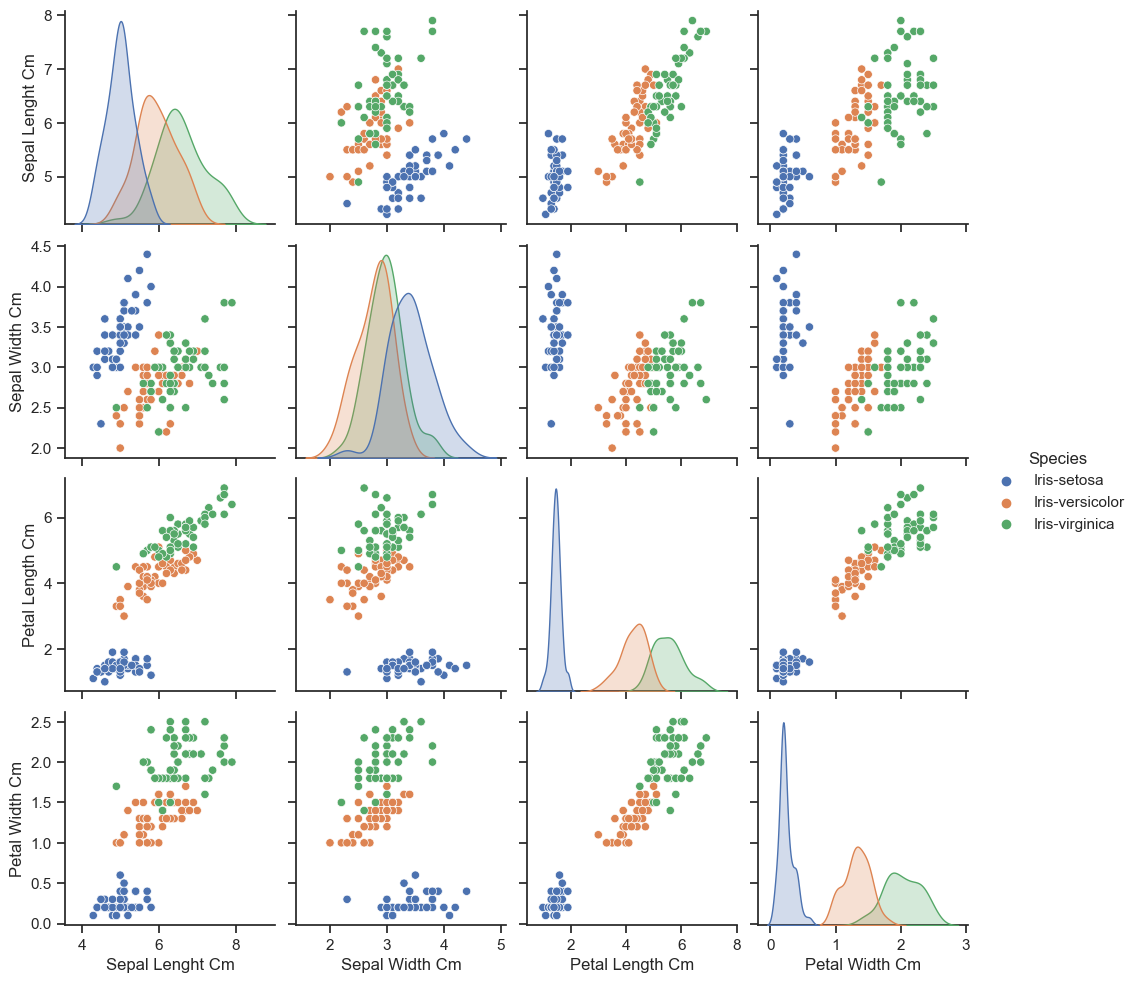

In [24]:
sns.set(style = "ticks")

sns.pairplot(df,hue="Species")

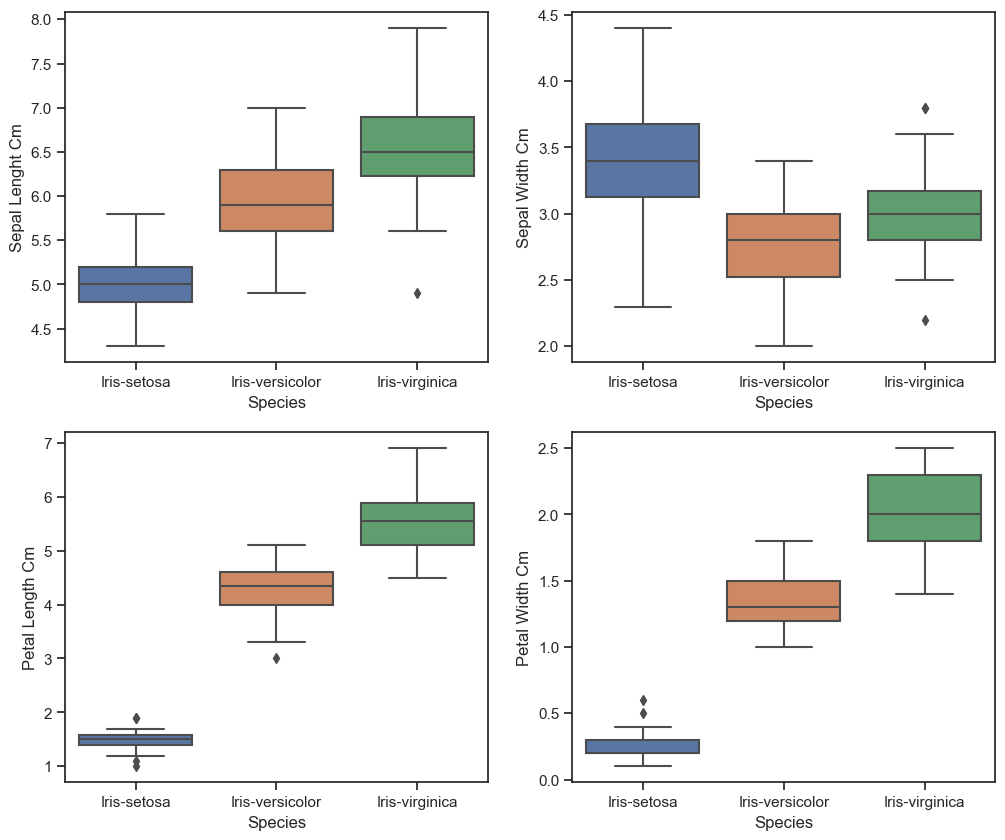

In [27]:
sns.set(style="ticks")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Lenght Cm",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width Cm",data=df)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal Length Cm",data=df)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width Cm",data=df)
plt.show()

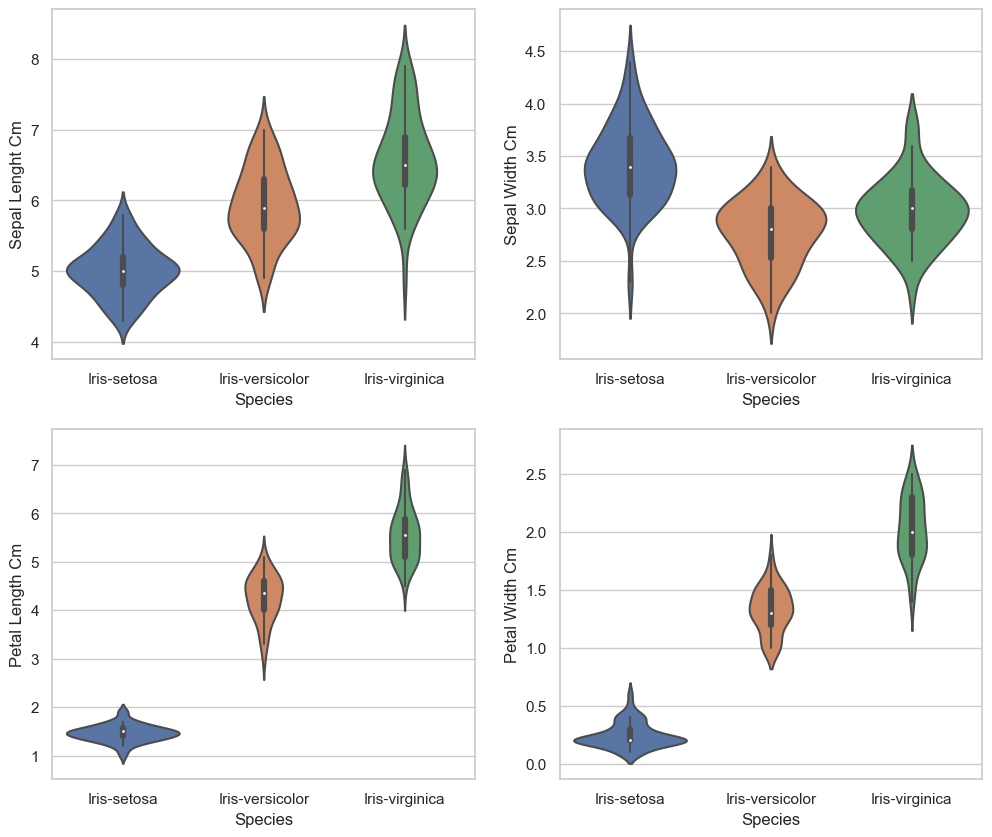

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="Sepal Lenght Cm",data=df)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="Sepal Width Cm",data=df)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="Petal Length Cm",data=df)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="Petal Width Cm",data=df)
plt.show()

In [30]:
df.shape

(150, 5)

In [32]:
df.describe()

,Sepal Lenght Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


[]

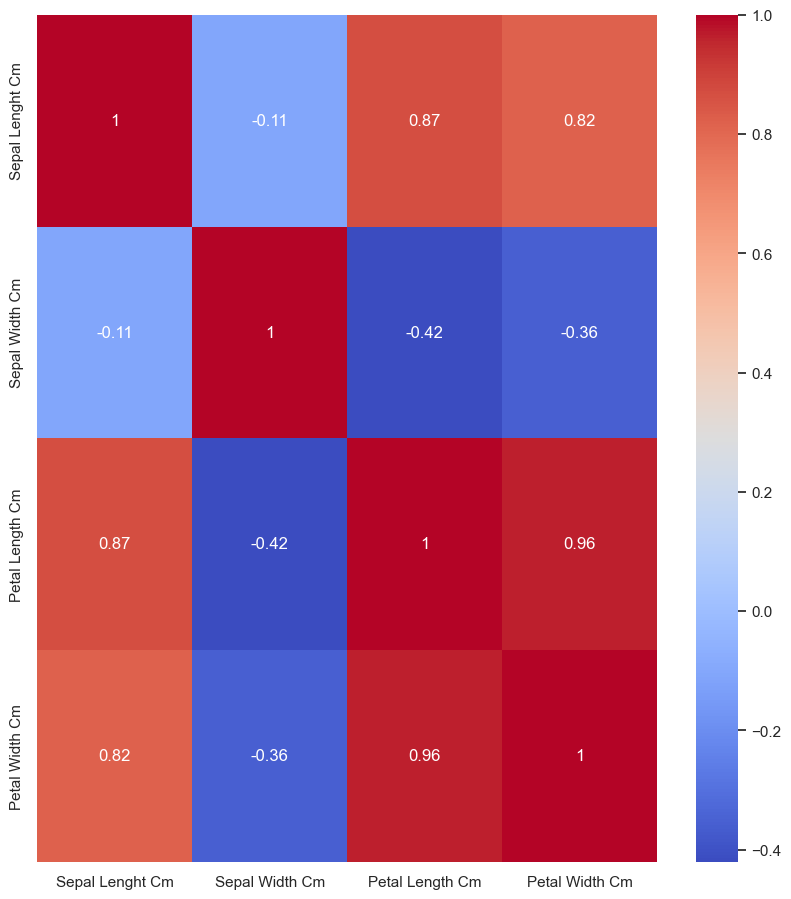

In [33]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")
plt.plot()

In [34]:
# girdileri ve çıktıları ayırıyoruz.
x = df.iloc[:,[0,1,2,3]]
y = df.iloc[:,4]

In [35]:
x

,Sepal Lenght Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [37]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
onehot_encoder = preprocessing.OneHotEncoder()
y = onehot_encoder.fit_transform(y[:,np.newaxis]).toarray()

In [40]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [41]:
scaler = preprocessing.StandardScaler()
scaler.fit_transform(x)

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [42]:
x_egitim, x_test, y_egitim, y_test = train_test_split(x, y, test_size = 0.3, random_state=2)

In [43]:
girdi_sayisi = x_egitim.shape[1]
sinif_sayisi = y_egitim.shape[1]

In [44]:
model = Sequential()

model.add(Dense(8,input_dim = girdi_sayisi, activation = 'relu'))
model.add(Dense(sinif_sayisi, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(x_egitim, y_egitim, batch_size=16, epochs=70)

Epoch 1/70
7/7 [==============================] - 0s 2ms/step - loss: 3.8822 - accuracy: 0.3524
Epoch 2/70
7/7 [==============================] - 0s 2ms/step - loss: 2.5679 - accuracy: 0.3524
Epoch 3/70
7/7 [==============================] - 0s 2ms/step - loss: 1.7548 - accuracy: 0.3524
Epoch 4/70
7/7 [==============================] - 0s 2ms/step - loss: 1.3918 - accuracy: 0.3524
Epoch 5/70
7/7 [==============================] - 0s 2ms/step - loss: 1.2093 - accuracy: 0.3524
Epoch 6/70
7/7 [==============================] - 0s 2ms/step - loss: 1.0899 - accuracy: 0.3524
Epoch 7/70
7/7 [==============================] - 0s 2ms/step - loss: 1.0535 - accuracy: 0.3524
Epoch 8/70
7/7 [==============================] - 0s 2ms/step - loss: 1.0469 - accuracy: 0.3524
Epoch 9/70
7/7 [==============================] - 0s 2ms/step - loss: 1.0433 - accuracy: 0.3524
Epoch 10/70
7/7 [==============================] - 0s 1ms/step - loss: 1.0361 - accuracy: 0.3524
Epoch 11/70
7/7 [======================

In [46]:
sonuc = model.evaluate(x_test, y_test, verbose=0)
print("Test yitim değeri : ", sonuc[0])
print("Test doğruluk değeri : ",sonuc[1])

Test yitim değeri :  0.6742127537727356
Test doğruluk değeri :  0.8444444537162781
